## Exploratory Data Analysis

This file showcases the basic elements of EDA on simple examples.

The major steps of the DS lifecycle are:

- Obtain
- Scrub (Clean)
- Explore (EDA)
- Model
- Interpret (Deploy)

Here will be covered first 3 of them.

### Statistics: basics

In [28]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

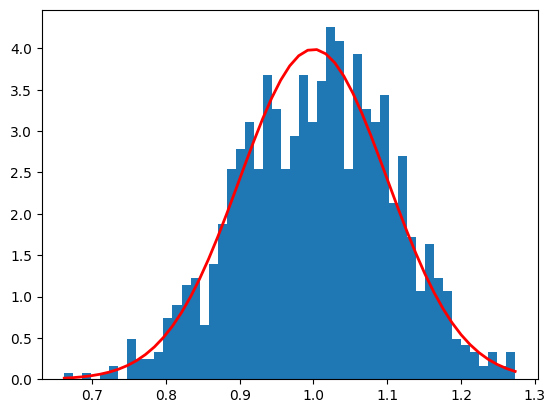

In [29]:
# Random variable, normal distribution
# x = meat consumption from Silpo over the last 1000 days
# y = probability that x meat amount will be bought on a given day

mu, sigma = 1, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

prob, bins, ignored = plt.hist(s, 50, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')
plt.show()

In [30]:
len(s)

1000

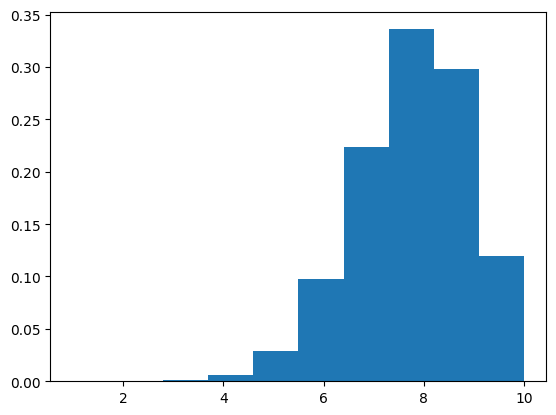

In [31]:
# Random variable, binomial distribiution
# x = number of times we throw heads in 10 coin flips
# y = probability to see x heads

n, p = 10, 0.8 # number of flips, probability of each result in a flip
s = np.random.binomial(n, p, 1000000) # 1000 trials

probs, bins, ignored = plt.hist(s, n, density=True)
plt.show()

In [32]:
prob

array([0.08182545, 0.        , 0.08182545, 0.        , 0.08182545,
       0.1636509 , 0.        , 0.49095271, 0.24547636, 0.24547636,
       0.32730181, 0.73642907, 0.90007998, 1.14555633, 1.22738179,
       0.65460362, 1.39103269, 1.8819854 , 2.53658902, 2.78206538,
       3.10936719, 2.53658902, 3.68214536, 3.27301809, 2.53658902,
       2.94571628, 3.68214536, 3.10936719, 3.6003199 , 4.25492352,
       4.09127262, 2.53658902, 3.92762171, 3.27301809, 3.10936719,
       3.436669  , 2.12746176, 2.70023993, 1.7183345 , 1.06373088,
       1.63650905, 1.22738179, 1.06373088, 0.49095271, 0.40912726,
       0.32730181, 0.1636509 , 0.32730181, 0.1636509 , 0.32730181])

In [33]:
# expected value
sum([(i*prob[i]) for i in range(n)])

np.float64(8.918974307254915)

In [34]:
s.mean()

np.float64(8.00052)

In [35]:
np.median(s)

np.float64(8.0)

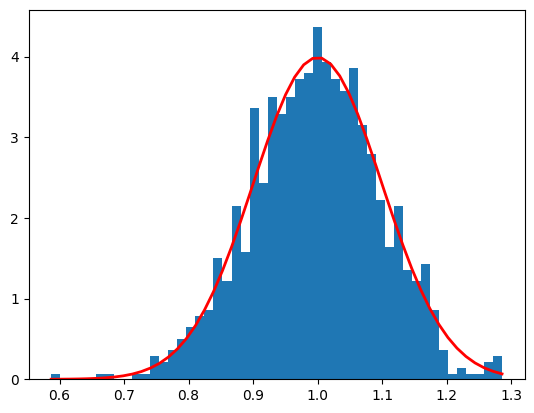

In [36]:
# Random variable, normal distribution - in more detail

# x = meat consumption from Silpo over the last 1000 days
# y = probability that x meat amount will be bought on a given day

mu, sigma = 1, 0.1 # mean and standard deviation
x = np.random.normal(mu, sigma, 1000)

prob, bins, ignored = plt.hist(x, 50, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')
plt.show()

Probability density formula of **normal (Gaussian) distribution**:

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2}
$$

In [37]:
from scipy.stats import norm

probability_pdf = norm.pdf(0.85, loc=mu, scale=sigma)
print(probability_pdf)

1.2951759566589167


In [38]:
# average (mean)
x.mean()

np.float64(0.9962767988570818)

In [39]:
# variance
np.sum(((x - x.mean())**2)/len(x))

np.float64(0.009896797967815889)

In [40]:
# standard deviation
np.sqrt(np.sum(((x - x.mean())**2)/len(x)))

np.float64(0.0994826515922042)

In [41]:
# standard deviation
np.std(x)

np.float64(0.0994826515922042)

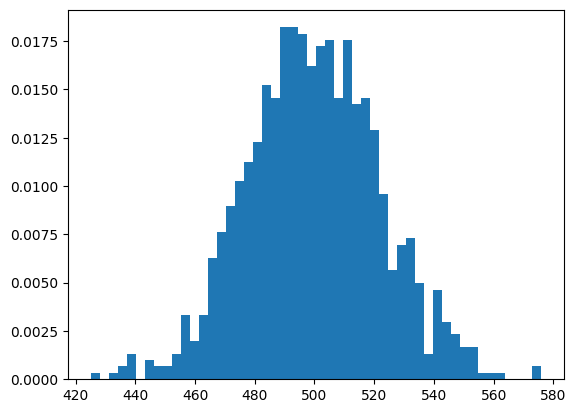

In [49]:
# new variable: z = number of active coupons for discount on meat
# Poisson distribution is a discrete distribution that counts the frequency
# of occurrences as integers, whose list {0, 1, 2, ...} can be infinitive
z = np.random.poisson(500, 1000)
prob, bins, ignored = plt.hist(z, 50, density=True)
plt.show()

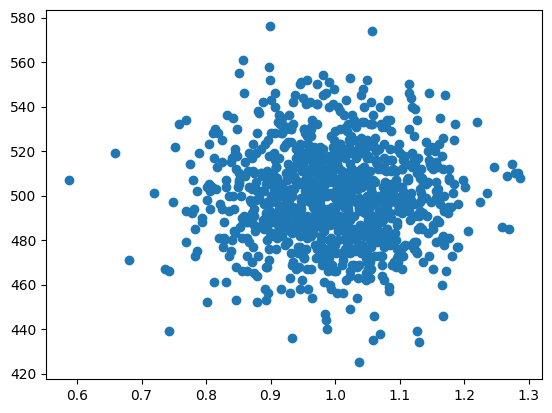

In [50]:
plt.scatter(x, z)

In [51]:
np.cov(x, z)[0][1]
# Note that element C0_1, which shows the covariance between x and z, is negative.

np.float64(-0.0232071913851562)

In [52]:
np.std(x)

np.float64(0.0994826515922042)

In [53]:
np.std(z)

np.float64(22.042059794855835)

In [ ]:
np.corrcoef(x, z) # [0][1]

array([[ 1.        , -0.01057276],
       [-0.01057276,  1.        ]])

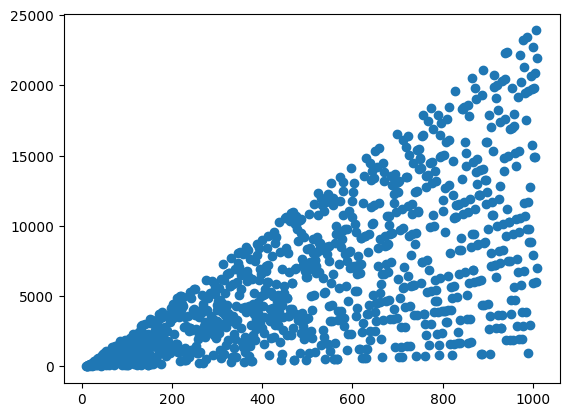

In [58]:
u = np.arange(10, 1010)
j = np.arange(0, 1000)*np.random.randint(1, 25, size=(1000))
plt.scatter(u, j)

In [59]:
np.cov(u, j)[0][1]

np.float64(1023517.9184184184)

In [61]:
np.corrcoef(u, j)[0][1]

np.float64(0.6705512921849665)

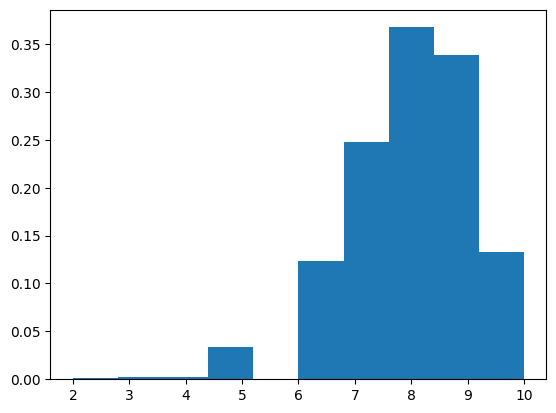

In [70]:
# Central limit theorem

N = 100000000
n = 1000
s = np.random.binomial(10, 0.8, N)
s = s.reshape((N//n, n))

prob, bins, ignored = plt.hist(s[0], 10, density=True)
plt.show()

In [71]:
len(s)

100000

In [72]:
s_means = s.mean(axis=1)
s_means

array([7.982, 8.051, 8.   , ..., 8.03 , 7.989, 7.936])

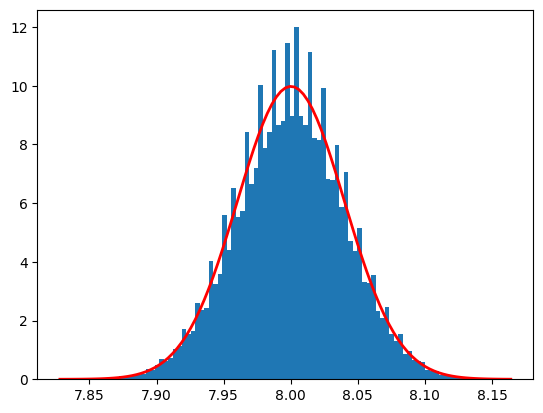

In [73]:
sigma = s_means.std()
mu = s_means.mean()

prob, bins, ignored = plt.hist(s_means, 100, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')
plt.show()

### Pandas
`# intro`

In [74]:
import pandas as pd

mountain_height = pd.Series([2061, 2035.8, 2028.5, 2022.5, 2016.4])

print(mountain_height)

0    2061.0
1    2035.8
2    2028.5
3    2022.5
4    2016.4
dtype: float64


In [ ]:
mountains_height = pd.Series(
    data=[2061, 2035.8, 2028.5, 2022.5, 2016.4],
    index=["Goverla", "Brebenskyl", "Pip_Ivan", "Petros", "Gutin_Tomnatik"],
    name="Height, m",
    dtype=float,
)